## Select data to load based on keywords in experiment name

In [2]:
import pandas as pd
import os

logs_dir = "logs"
logs_dir = "benchmark_results"
experiment_name = "experiment_1percent"
# experiment_name = "experiment_good"
# experiment_name = "experiment_small"
dataset_name = "diabetes"
# dataset_name = "kaggle_hf"
results_file = "per_center_results.csv"
keywords = [
    experiment_name,
    dataset_name,
    # "logistic_regression",
    # "forest",
    #   "c10"
    #   "a0.7"
    #   "a1.0"
      "aNone"
    ]

def load_data(logs_dir, experiment_name, keywords, results_file="per_center_results.csv"):
    data = {}

    # iterate over all directories in logs_dir with names containing all the keywords
    dirs = [d for d in os.listdir(logs_dir) if all(keyword in d for keyword in keywords)]
    for d in dirs:    
        model_name = d
        # model_name = model_name.replace(experiment_name+"_", "")
        model_name = model_name.replace(experiment_name+"_"+dataset_name+"_", "")
        model_name = model_name.replace("_", " ")
        model_name = model_name.title()
        model_name = model_name.replace("none", "N")
        # Find position of _c keyword
        pos = model_name.find(" C")
        # if pos != -1:
        #     if not model_name[pos+3].isdigit():
        #         model_name = model_name[:pos+2] + "0" + model_name[pos+2:]
        #remove non-capital letters
        # model_name = ''.join(c for c in model_name if c.isupper() or c == ' ' or c.isdigit())

        full_path = os.path.join(logs_dir, d)
        metrics_file = os.path.join(full_path, results_file)
        if os.path.isfile(metrics_file):
            df = pd.read_csv(metrics_file)
            data[model_name] = df

    print("Found ", len(data), " experiments")

    # Sort data by model_name
    data = dict(sorted(data.items()))

    # for model_name, df in data.items():
        # print(model_name)
    
    return data

### Print metric values

In [3]:
# metric = "balanced_accuracy"
# # metric = "accuracy"
# results = []
# #print average metric across all centers for each model
# for model_name, df in data.items():
#     #weighted average by number of samples in each center
#     total_samples = df["n samples"].sum()
#     weighted_sum = (df[metric] * df["n samples"]).sum()
#     avg_metric = weighted_sum / total_samples
#     results.append(f"{model_name}: {avg_metric:.4f}")
#     # print(f"{model_name}: {avg_metric:.4f}")

# # Sort results alphabetically by model name
# results.sort()
# for result in results:
#     print(result)

# Bar plot for all imported models

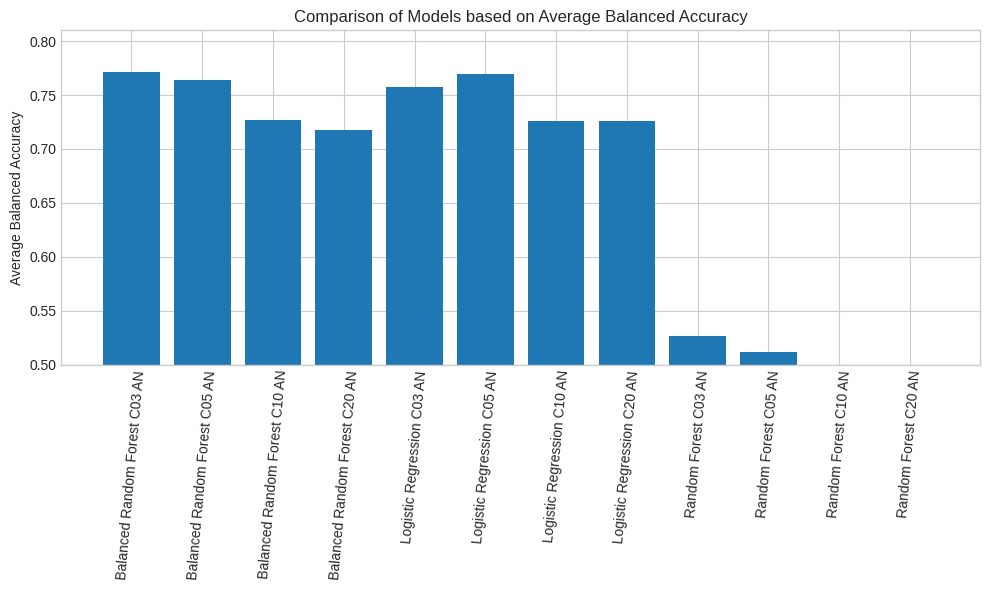

In [49]:
# Make a bar plot comparing the models based on the average metric
import matplotlib.pyplot as plt
model_names = []
avg_metrics = []
for model_name, df in data.items():
    total_samples = df["n samples"].sum()
    weighted_sum = (df[metric] * df["n samples"]).sum()
    avg_metric = weighted_sum / total_samples
    
    model_names.append(model_name)
    avg_metrics.append(avg_metric)

# Sort models by names
model_names, avg_metrics = zip(*sorted(zip(model_names, avg_metrics)))

plt.figure(figsize=(10, 6))
plt.bar(model_names, avg_metrics)
plt.ylabel(f'Average {metric.replace("_", " ").title()}')
plt.title(f'Comparison of Models based on Average {metric.replace("_", " ").title()}')
#start y-axis from 0.5
plt.ylim(bottom=0.5)
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()  



# Box Plots: Number of Clients 


In [10]:
# Feature selection experiment
# experiment_name = "experiment_good"
# experiment_name = "experiment_all_10percent"
experiment_name = "num_clients_ablation"
benchmark_dir = "benchmark_results_num_clients_ablation"
model_names = ["balanced_random_forest"]
datasets = ["diabetes"]
# num_clients = [5,10]
dirichlet_alpha = ["0.7"]
# dirichlet_alpha = ["aNone"]
keywords = [experiment_name] + datasets + dirichlet_alpha

data = load_data(benchmark_dir, experiment_name, keywords)

Found  20  experiments


Logistic Regression
                   model  run  n_clients                 alpha   
76   Logistic Regression    0         10  0.7 Normglobal FeatN  \
77   Logistic Regression    1         10  0.7 Normglobal FeatN   
78   Logistic Regression    2         10  0.7 Normglobal FeatN   
79   Logistic Regression    3         10  0.7 Normglobal FeatN   
80   Logistic Regression    4         10  0.7 Normglobal FeatN   
81   Logistic Regression    5         10  0.7 Normglobal FeatN   
82   Logistic Regression    6         10  0.7 Normglobal FeatN   
83   Logistic Regression    7         10  0.7 Normglobal FeatN   
84   Logistic Regression    8         10  0.7 Normglobal FeatN   
85   Logistic Regression    9         10  0.7 Normglobal FeatN   
86   Logistic Regression    0         20  0.7 Normglobal FeatN   
87   Logistic Regression    1         20  0.7 Normglobal FeatN   
88   Logistic Regression    2         20  0.7 Normglobal FeatN   
89   Logistic Regression    3         20  0.7 Normglobal

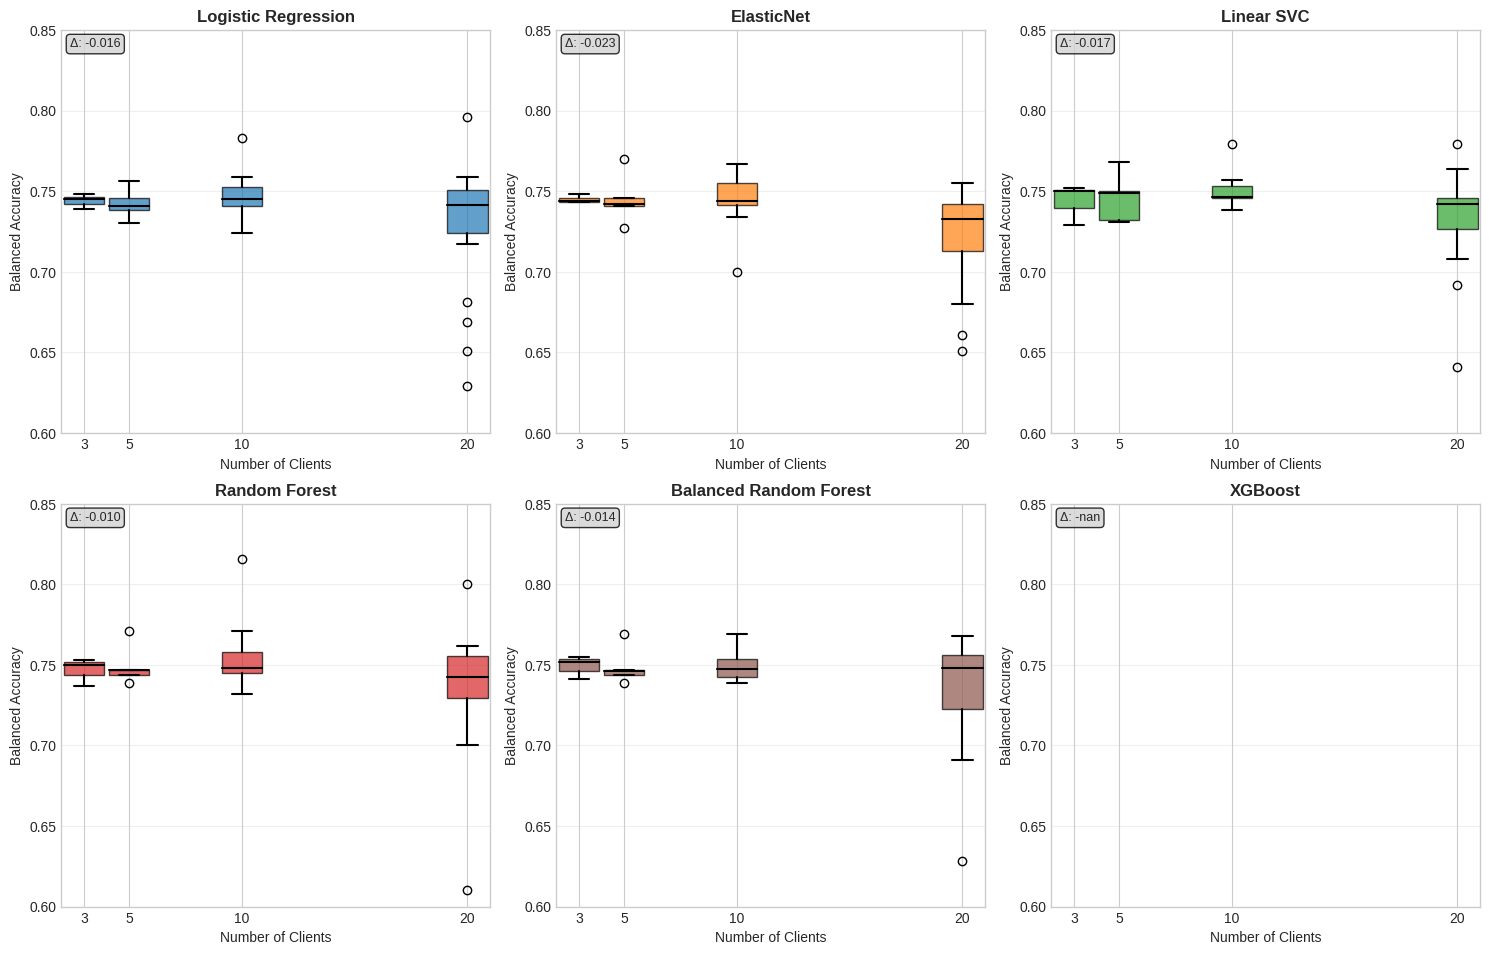

Federated Learning Benchmark Summary - Box Plot Analysis

Logistic Regression:
----------------------------------------
   3 clients: 0.7440 ± 0.0046 [0.7390, 0.7480]
   5 clients: 0.7422 ± 0.0097 [0.7300, 0.7560]
  10 clients: 0.7484 ± 0.0154 [0.7240, 0.7830]
  20 clients: 0.7285 ± 0.0407 [0.6290, 0.7960]
  Performance degradation (3→20 clients): 2.09%

ElasticNet:
----------------------------------------
   3 clients: 0.7450 ± 0.0026 [0.7430, 0.7480]
   5 clients: 0.7452 ± 0.0156 [0.7270, 0.7700]
  10 clients: 0.7443 ± 0.0189 [0.7000, 0.7670]
  20 clients: 0.7219 ± 0.0297 [0.6510, 0.7550]
  Performance degradation (3→20 clients): 3.09%

Linear SVC:
----------------------------------------
   3 clients: 0.7437 ± 0.0127 [0.7290, 0.7520]
   5 clients: 0.7460 ± 0.0152 [0.7310, 0.7680]
  10 clients: 0.7507 ± 0.0112 [0.7380, 0.7790]
  20 clients: 0.7269 ± 0.0428 [0.5920, 0.7790]
  Performance degradation (3→20 clients): 2.25%

Random Forest:
----------------------------------------
   3 cl

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score

# Set style for academic paper
plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 10

# Define models and client configurations (performance decreases with more clients)
models = ['Logistic Regression', 'ElasticNet', 'Linear SVC', 'Random Forest', 'Balanced Random Forest', 'XGBoost']
clients = [3, 5, 10, 20]  # Only these client numbers
# clients = [3, 5, 10]  # Only these client numbers

extracted_data = []
# metric = "auroc" 
metric = "local balanced_accuracy" 
# metric = "balanced_accuracy" 
for model_name, df in data.items():
    model = model_name.split(" C")[0]
    if model == "Elastic Net":
        model = "ElasticNet"
    if model == "Lsvc":
        model = "Linear SVC"
    num_clients = int(model_name.split(" C")[-1][:2])
    alpha = model_name.split(" A")[-1]
    metric_scores = df[metric].values
    for center, score in enumerate(metric_scores):
        extracted_data.append({
                'model': model,
                'run': center,  # Placeholder, as run info is not available
                'n_clients': num_clients,
                'alpha': alpha,
                metric: score
            })
        
# Convert to DataFrame
df = pd.DataFrame(extracted_data)

# print(df)

# Create 3x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Define colors for each model
colors = {
    'Logistic Regression': '#1f77b4',
    'ElasticNet': '#ff7f0e', 
    'Linear SVC': '#2ca02c',
    'Random Forest': '#d62728',
    'Balanced Random Forest': '#8c564b',
    'XGBoost': '#9467bd',
    'MLP': '#8c564b'
}

x_positions = clients

# Plot box plots for each model in separate subplots
for i, model in enumerate(models):
    if i < len(axes):  # Ensure we don't exceed subplot count
        ax = axes[i]
        model_data = df[df['model'] == model]
        print(model)
        print(model_data)
        # Prepare data for boxplot
        boxplot_data = []
        client_labels = []
        box_positions = []

        for client_idx, client in enumerate(clients):
            client_data = model_data[model_data['n_clients'] == client][metric]
            boxplot_data.append(client_data)
            box_positions.append(x_positions[client_idx])
            client_labels.append(f'{client}')
        
        
        # print(f"Model: {model}")
        # print("Box data:", boxplot_data)
        
        
        # Create box plot with custom positions
        # Adjust width relative to the x-axis scale
        # Base width on the smallest gap between client numbers
        min_gap = min([x_positions[i+1] - x_positions[i] for i in range(len(x_positions)-1)])
        box_width = min_gap * 0.9  # Adjust this factor to control box width
        
        box_plots = ax.boxplot(boxplot_data, positions=box_positions, 
                              widths=box_width, patch_artist=True,
                              showmeans=False, 
                              meanprops={'marker':'o', 'markerfacecolor':'white', 
                                       'markeredgecolor':'black'})
        # Color the boxes
        for patch in box_plots['boxes']:
            patch.set_facecolor(colors[model])
            patch.set_alpha(0.7)
        
        # Customize box plot elements
        for element in ['whiskers', 'caps', 'medians']:
            for line in box_plots[element]:
                line.set_color('black')
                line.set_linewidth(1.5)

        # Set x-ticks to client numbers
        ax.set_xticks(box_positions)
        ax.set_xticklabels(client_labels)
        
        print(model, boxplot_data)
        # Set subplot title and labels
        ax.set_title(f'{model}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Number of Clients', fontsize=10)
        metric_formatted = metric.replace("_", " ").title()
        ax.set_ylabel(metric_formatted, fontsize=10)
        
        # Set consistent y-axis across all subplots
        # ax.set_ylim(0.5, 0.78)
        ax.set_ylim(0.6, 0.85)

        # Set x-axis limits with some padding
        ax.set_xlim(min(box_positions) - min_gap * 0.5, 
                   max(box_positions) + min_gap * 0.5)
        
        # Add grid
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add trend annotation
        means = [np.mean(client_data) for client_data in boxplot_data]
        trend = means[0] - means[-1]  # Performance drop from 3 to 20 clients
        
        # Add performance degradation annotation
        ax.text(0.02, 0.98, f'Δ: -{trend:.3f}', transform=ax.transAxes, 
                fontsize=9, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

# Remove empty subplot if we have 6 models in 3x3 grid
if len(models) < len(axes):
    for i in range(len(models), len(axes)):
        fig.delaxes(axes[i])

# Add overall title
# fig.suptitle('Federated Learning Benchmark: Model Performance Distribution vs Number of Clients\n'
            #  'Box Plots Showing Performance Degradation with Increasing Clients', 
            #  fontsize=14, fontweight='bold', y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Print detailed statistics for the paper
print("Federated Learning Benchmark Summary - Box Plot Analysis")
print("=" * 80)

for model in models:
    print(f"\n{model}:")
    print("-" * 40)
    model_data = df[df['model'] == model]
    
    for client in clients:
        client_data = model_data[model_data['n_clients'] == client][metric]
        mean_auc = client_data.mean()
        std_auc = client_data.std()
        min_auc = client_data.min()
        max_auc = client_data.max()
        
        print(f"  {client:2d} clients: {mean_auc:.4f} ± {std_auc:.4f} "
              f"[{min_auc:.4f}, {max_auc:.4f}]")
    
    # Calculate overall degradation
    perf_3 = model_data[model_data['n_clients'] == 3][metric].mean()
    perf_20 = model_data[model_data['n_clients'] == 20][metric].mean()
    degradation = ((perf_3 - perf_20) / perf_3) * 100
    print(f"  Performance degradation (3→20 clients): {degradation:.2f}%")

# Comparative analysis
print("\n" + "=" * 80)
print("COMPARATIVE ANALYSIS:")
print("=" * 80)

# Find best performing model at each client count
for client in clients:
    client_data = df[df['n_clients'] == client]
    best_model = None
    best_auc = 0
    
    for model in models:
        model_auc = client_data[client_data['model'] == model][metric].mean()
        if model_auc > best_auc:
            best_auc = model_auc
            best_model = model

    print(f"Best at {client:2d} clients: {best_model} ({metric}: {best_auc:.4f})")

# Overall best model
overall_means = df.groupby('model')[metric].mean()
best_overall_model = overall_means.idxmax()
best_overall_auc = overall_means.max()

print(f"\nOverall best model: {best_overall_model} (Avg {metric}: {best_overall_auc:.4f})")

# Table: Normalization impact

In [ ]:
# Normalization experiment
experiment_name = "normalization"
logs_dir = "benchmark_results_normalization"
model_names = ["logistic_regression"]
datasets = ["diabetes"]
num_clients = [10]
dirichlet_alpha = ["None"]
data_normalization = ["global", "local", None]
keywords = [experiment_name]
data = load_data(logs_dir, experiment_name, keywords, results_file="per_center_results.csv")

# Write a code to extract the following metrics, calculate weighted averages and standard deviations and create a table with rows as models and columns as metrics in latex format
metrics_to_extract = ["balanced_accuracy", "auroc"]
table_data = {}
for model_name, df in data.items():
    # model = model_name.split(" Norm")[1]
    model = model_name
    total_samples = df["n samples"].sum()
    table_data[model] = {}
    for metric in metrics_to_extract:
        weighted_sum = (df[metric] * df["n samples"]).sum()
        avg_metric = weighted_sum / total_samples
        std_metric = ( ((df[metric] - avg_metric)**2 * df["n samples"]).sum() / total_samples )**0.5
        table_data[model][metric] = (avg_metric, std_metric)

# Print nicely formatted table
print("\nWeighted Average Metrics Table:\n")
header = "Model".ljust(30)
for metric in metrics_to_extract:
    header += f"{metric.replace('_', ' ').title():>30}"
print(header)
for model, metrics in table_data.items():
    row = model.ljust(30)
    for metric in metrics_to_extract:
        avg, std = metrics[metric]
        row += f"{avg:.3f} ± {std:.3f}".rjust(30)
    print(row)


# Create latex table
latex_table = "\\begin{tabular}{l" + "c" * len(metrics_to_extract) + "}\n"
latex_table += "Model"
for metric in metrics_to_extract:
    latex_table += f" & {metric.replace('_', ' ').title()}"
latex_table += " \\\\\n\\hline\n"
for model, metrics in table_data.items():
    latex_table += model
    for metric in metrics_to_extract:
        avg, std = metrics[metric]
        latex_table += f" & {avg:.3f} $\\pm$ {std:.3f}"
    latex_table += " \\\\\n"
latex_table += "\\end{tabular}"
print("\nLaTeX Table:\n")
print(latex_table)



Weighted Average Metrics Table:

Model                                      Balanced Accuracy                         Auroc
Diabetes Logistic Regression C10 A0.7 NormN FeatN                 0.654 ± 0.021                 0.729 ± 0.034
Diabetes Logistic Regression C10 A0.7 Normglobal FeatN                 0.745 ± 0.041                 0.803 ± 0.049
Diabetes Logistic Regression C10 A0.7 Normlocal FeatN                 0.730 ± 0.024                 0.801 ± 0.056
Diabetes Logistic Regression C10 AN NormN FeatN                 0.665 ± 0.017                 0.725 ± 0.014
Diabetes Logistic Regression C10 AN Normglobal FeatN                 0.755 ± 0.011                 0.829 ± 0.009
Diabetes Logistic Regression C10 AN Normlocal FeatN                 0.759 ± 0.011                 0.830 ± 0.010
Ukbb Cvd Logistic Regression C10 A0.7 NormN FeatN                 0.515 ± 0.009                 0.529 ± 0.027
Ukbb Cvd Logistic Regression C10 A0.7 Normglobal FeatN                 0.742 ± 0.035         

# Table: Feature Selection

In [37]:
# Feature selection experiment
experiment_name = "feature_selection"
benchmark_dir = "benchmark_results_feature_selection"
model_names = ["balanced_random_forest"]
datasets = ["ukbb_cvd"]
num_clients = [5,10]
dirichlet_alpha = [0.7, None]
data_normalization = ["global"]
n_features = [10, 20, 35, 40, None]
keywords = [experiment_name]

data = load_data(benchmark_dir, experiment_name, keywords)
# Write a code to extract the following metrics, calculate weighted averages and standard deviations and create a table with rows as models and columns as metrics in latex format
metrics_to_extract = ["balanced_accuracy", "auroc", "round_time [s]"]
table_data = {}
for model_name, df in data.items():
    # model = model_name.split(" Norm")[1]
    model = model_name
    total_samples = df["n samples"].sum()
    table_data[model] = {}
    for metric in metrics_to_extract:
        weighted_sum = (df[metric] * df["n samples"]).sum()
        avg_metric = weighted_sum / total_samples
        std_metric = ( ((df[metric] - avg_metric)**2 * df["n samples"]).sum() / total_samples )**0.5
        table_data[model][metric] = (avg_metric, std_metric)

# Print nicely formatted table
print("\nWeighted Average Metrics Table:\n")
header = "Model".ljust(30)
for metric in metrics_to_extract:
    header += f"{metric.replace('_', ' ').title():>30}"
print(header)
for model, metrics in table_data.items():
    row = model.ljust(30)
    for metric in metrics_to_extract:
        avg, std = metrics[metric]
        row += f"{avg:.3f} ± {std:.3f}".rjust(30)
    print(row)


# Create latex table
latex_table = "\\begin{tabular}{l" + "c" * len(metrics_to_extract) + "}\n"
latex_table += "Model"
for metric in metrics_to_extract:
    latex_table += f" & {metric.replace('_', ' ').title()}"
latex_table += " \\\\\n\\hline\n"
for model, metrics in table_data.items():
    latex_table += model
    for metric in metrics_to_extract:
        avg, std = metrics[metric]
        latex_table += f" & {avg:.3f} $\\pm$ {std:.3f}"
    latex_table += " \\\\\n"
latex_table += "\\end{tabular}"
print("\nLaTeX Table:\n")
print(latex_table)


Found  19  experiments

Weighted Average Metrics Table:

Model                                      Balanced Accuracy                         Auroc                Round Time [S]
Ukbb Cvd Balanced Random Forest C10 A0.7 Normglobal Feat10                 0.749 ± 0.029                 0.817 ± 0.027                 1.425 ± 0.274
Ukbb Cvd Balanced Random Forest C10 A0.7 Normglobal Feat20                 0.759 ± 0.021                 0.829 ± 0.024                 1.501 ± 0.275
Ukbb Cvd Balanced Random Forest C10 A0.7 Normglobal Feat35                 0.754 ± 0.024                 0.829 ± 0.024                 1.591 ± 0.292
Ukbb Cvd Balanced Random Forest C10 A0.7 Normglobal Feat40                 0.753 ± 0.022                 0.827 ± 0.024                 1.638 ± 0.346
Ukbb Cvd Balanced Random Forest C10 A0.7 Normglobal FeatN                 0.754 ± 0.027                 0.826 ± 0.024                 1.636 ± 0.321
Ukbb Cvd Balanced Random Forest C10 AN Normglobal Feat10                 0.749